# Unsupervised Learning Methods


## Introduction to Clustering

#### Definition and Purpose

Clustering, a fundamental technique in the field of machine learning and data mining, involves grouping a set of objects in such a way that objects in the same group (or cluster) are more similar to each other than to those in other groups. Its main goal is to discover the inherent grouping in a data set.

#### Applications

Clustering has a wide array of applications in various domains:
- **Business:** Market segmentation, customer segmentation, and inventory categorization.
- **Biology:** Gene expression analysis, ecological studies, and species grouping.
- **Information Retrieval:** Document clustering for better information retrieval systems.
- **Image Processing:** Image segmentation, object recognition, and compression.
- **Social Network Analysis:** Community detection and analysis of social groups.

#### Types of Clustering

Clustering methods can be broadly categorized into the following types, each with its unique approach and use cases:

1. **Partitioning Methods:** These methods partition the dataset into a set of clusters. The most famous example is K-Means clustering. These methods are efficient but sensitive to the choice of the number of clusters and initial centroids.

2. **Hierarchical Methods:** These methods create a tree of clusters. They are either agglomerative (bottom-up) or divisive (top-down). They are particularly useful for hierarchical data and produce dendrograms that help in understanding data structure.

3. **Density-Based Methods:** Such methods, like DBSCAN, define clusters as areas of higher density than the remainder of the data set. They are great for data with noise and outliers and can find clusters of any shape.

4. **Grid-Based Methods:** These methods quantize the space into a finite number of cells (a grid structure) and then do the clustering operations on the grid structure. They are typically faster than other methods but less precise.

5. **Model-Based Methods:** These methods hypothesize a model for each of the clusters and find the best fit of the data to the given model. Gaussian Mixture Models are a prime example. They are more flexible but also more complex.

#### Prerequisites

##### Distance Metrics

1. **Euclidean Distance**
   - **Formula:** $ ||x_i - y_i || = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} $
   - **Pros:** Intuitive and works well for clusters with spherical shapes.
   - **Cons:** Not suitable for high-dimensional data; sensitive to outliers.

2. **Manhattan Distance (City Block Distance)**
   - **Formula:** $ \sum_{i=1}^{n} |x_i - y_i| $
   - **Pros:** More robust to outliers compared to Euclidean.
   - **Cons:** May not accurately capture similarity in high-dimensional spaces.

3. **Cosine Similarity**
   - **Formula:** $ \frac{A \cdot B}{||A|| \ ||B||} $, where $ A \cdot B $ is the dot product.
   - **Pros:** Useful for text data or in high-dimensional data.
   - **Cons:** Does not take magnitude into account, only orientation.

### Partitioning Methods

#### K-Means Clustering

##### 1. Mechanics of K-Means

K-Means is a popular centroid-based, partitioning clustering algorithm. Its mechanics can be summarized as follows:

1. **Initialization:** Randomly select $k$ centroids from the data points.

2.  **Assignment Step:** Assign each data point to the nearest centroid, forming k clusters.

3. **Update Step:** Recalculate centroids as the mean of all points in each cluster.

4. **Iteration:** Repeat the assignment and update steps until convergence, which occurs when the assignments no longer change or the centroids stabilize.

##### Key Considerations:
- **Number of Clusters (k):** Choosing the right $k$ is crucial. Methods like the Elbow Method and Silhouette Analysis are often used.
- **Initial Centroids:** The initial selection can affect the final outcome. Running K-Means multiple times with different initializations is common.
- **Convergence:** K-Means may converge to a local optimum, not necessarily the global optimum.

##### 2. Model Evaluation

- **Inertia (Within-Cluster Sum of Squares):** It's the sum of squared distances of samples to their closest cluster center. Mathematically, if $ c_i $ is the center of cluster $ C_i $, then inertia is:
  - $ \sum_{i=1}^{k} \sum_{x \in C_i} ||x - c_i||^2 $.
  - Lower inertia indicates a better model.
  
- **Silhouette Score:** This measure calculates how similar an object is to its own cluster compared to other clusters. The Silhouette Score for a single sample is $ s = \frac{b - a}{max(a, b)} $,
  - $ a $ is the mean distance to the other instances in the same cluster
  - $ b $ is the mean nearest-cluster distance, i.e., the distance to the instances of the next closest cluster.
  - The Silhouette Score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

- The Elbow Method is a heuristic used in determining the number of clusters in a dataset. The basic idea is to run the K-Means clustering for a range of values of k (number of clusters), and for each value, calculate the sum of squared distances from each point to its assigned center (inertia). When these overall intra-cluster distances are plotted against the number of clusters, the "elbow point," where the rate of decrease sharply changes, represents an appropriate number of clusters. The Elbow Method is subjective, as the "elbow" might not always be clear or may be interpretable differently by different analysts. However, it provides a simple and useful first approximation.


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

# Load the dataset
iris = load_iris()
X = iris.data

# Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Applying K-Means to the dataset with an optimal number of clusters
optimal_clusters = 3  # This value is chosen based on the Elbow Method plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title(f'K-Means Clustering of Iris Dataset with {optimal_clusters} Clusters')
plt.grid(True)
plt.show()

# Model Evaluation
print(f"Inertia: {kmeans.inertia_}")
print(f"Silhouette Score: {silhouette_score(X, labels)}")


#### K-Medoids
#### 1. Mechanics of K-Medoids

K-Medoids, like K-Means, is a partitioning clustering method, but with a key difference in the selection of the centroids. Here's how it works:

1. **Initialization:** Select $k$ data points as the initial medoids, usually randomly.
2. **Assignment Step:** Assign each data point to the nearest medoid, forming k clusters.
3. **Update Step:** For each medoid and each data point in its cluster, compute the total cost of swapping the medoid with the data point. If any swap reduces the cost, make the swap to update the medoid. For a given cluster, the cost is calculated as the sum of the distances between each point in the cluster and its medoid.  
4. **Iteration:** Repeat the assignment and update steps until no further improvement can be made.

#### Key Considerations:
- **Robustness:** Unlike K-Means, K-Medoids is less sensitive to outliers since medoids are actual data points.
- **Distance Metric:** It can work with any distance metric, making it more versatile.
- **Computational Cost:** Generally, K-Medoids is more computationally expensive than K-Means.

#### 2. Model Evaluation

Model evaluation for K-Medoids can be similar to K-Means:
- **Silhouette Score:** Useful for assessing the separation distance between the resulting clusters.
- **Davies-Bouldin Index:** A lower value means a better partitioning.



In [ ]:
# Import necessary libraries
! pip install scikit-learn-extra
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

# Load the dataset
iris = load_iris()
X = iris.data

# Apply K-Medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(X)
labels = kmedoids.labels_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Medoids Clustering of Iris Dataset')
plt.show()

# Model Evaluation
print(f"Silhouette Score: {silhouette_score(X, labels)}")

### Hierarchical Clustering

#### Agglomerative (Bottom-Up) Clustering

1. **Initialization:** Start with $ N $ clusters, each containing one data point.
2. **Merge Step:** At each step, merge the two closest clusters.
3. **Repeat:** Continue until the desired number of clusters is reached or a distance threshold is met.

Distance between clusters (linkage criteria):

1. **Single Linkage:** Minimum distance between elements of each cluster.
   - **Formula:** $ \min(\text{dist}(a,b)) $ for $ a \in A, b \in B $
   - **Pros:** Can handle non-elliptical shapes.
   - **Cons:** Prone to chaining effect, i.e., clusters can be merged due to a few data points that act like a "chain" or "bridge" between two otherwise distinct clusters. Even if most of the data points in two clusters are far apart, a small number of points that are close to each other can lead to the merging of these clusters.

2. **Complete Linkage:** Maximum distance between elements of each cluster.
   - **Formula:** $ \max(\text{dist}(a,b)) $
   - **Pros:** Less susceptible to noise and outliers.
   - **Cons:** Tends to form clusters of similar sizes.

3. **Average Linkage:** Average distance between elements of each cluster.
   - **Formula:** $ \frac{1}{|A||B|} \sum_{a \in A, b \in B} \text{dist}(a,b) $
   - **Pros:** Balanced approach; less susceptible to outliers.
   - **Cons:** May not perform well for clusters with varying densities.

4. **Ward's Method:** Minimizes variance within each cluster.
   - **Formula:** Minimize the increase in total within-cluster variance.
   - **Pros:** Creates evenly sized and shaped clusters.
   - **Cons:** Tends to create spherical clusters.

##### Hyperparameters

- **Linkage:** Determines the criterion to merge clusters (e.g., single, complete, average, Ward's method).
- **Affinity (Distance Metric):** Metric to compute distance between data points (e.g., Euclidean, Manhattan).
- **Distance Threshold:** Stops clustering when the last merge occurs at a distance greater than this threshold.

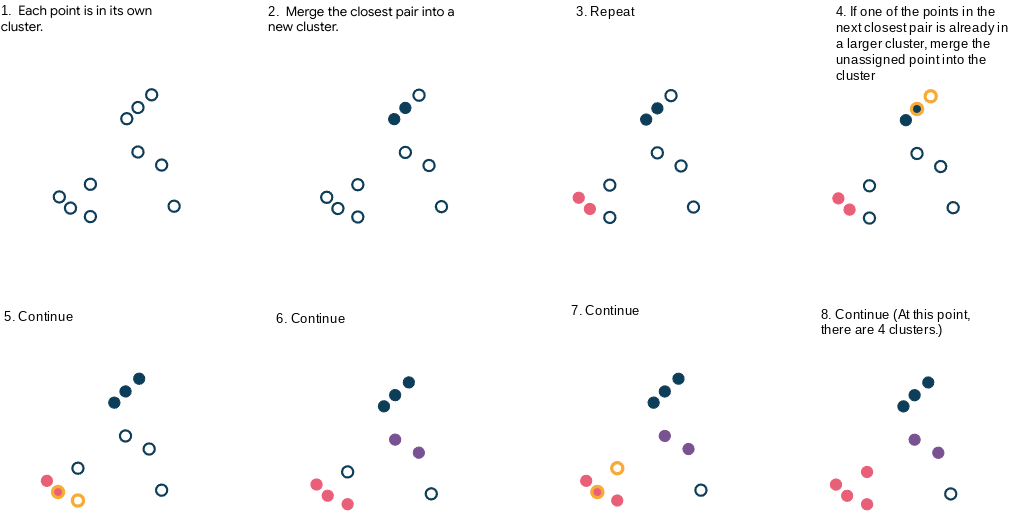
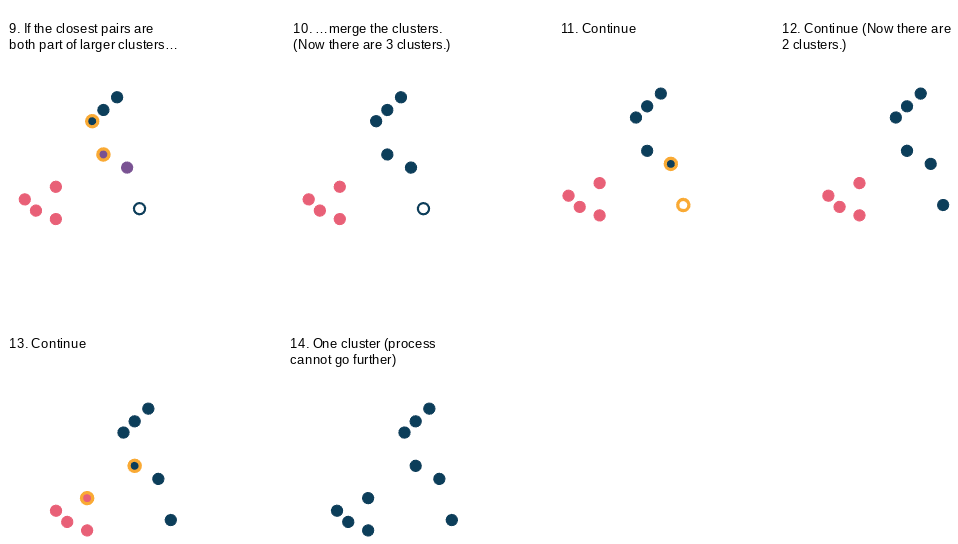

In [ ]:
# Import necessary libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load the dataset
iris = load_iris()
X = iris.data

# Using the linkage function from scipy's cluster hierarchy
linked = linkage(X, 'single') # 'single' linkage for example

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=range(1, 151),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset)')
plt.show()

# Applying Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

# Visualizing the clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_, cmap='rainbow')
plt.title('Clusters from Hierarchical Clustering')
plt.show()


### Density-based Clustering

#### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is a popular density-based clustering non-parametric algorithm, known for its ability to identify clusters of arbitrary shapes and sizes.

#### Concept of Density Reachability and Connectivity

- **Density Reachability:** A point $a$ is said to be directly reachable from $b$ if $a$ is within a distance $ε$ (epsilon) from $b$, and $b$ has sufficient neighboring points ($MinPts$ or minimum points).
  
  - **Mathematically:** Point $A$ is directly reachable from $B$ if:
    - $ \text{dist}(a, b) \leq \epsilon $
    - Number of points within $ε$ of $b$ ≥ $MinPts$

- **Density Connectivity:** A point $a$ is density-connected to a point $b$ if there is a point $c$ such that both $a$ and $b$ are density-reachable from $c$.

#### Handling Outliers

- In DBSCAN, points that are not density-reachable from any cluster are considered outliers or noise.
- These points do not belong to any cluster, and DBSCAN can effectively identify and separate them from the main clusters.

#### Parameter Tuning

1. **Epsilon (ε):** The maximum distance between two samples for them to be considered in the same neighborhood.
   
   - **Choosing ε:** It depends on the data. A small ε might lead to many small clusters, whereas a large ε might merge distinct clusters.

2. **Minimum Samples (MinPts):** The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.

   - **Choosing MinPts:** A higher value of MinPts requires more density for a point to form a cluster, hence can be used to control the sensitivity to noise.


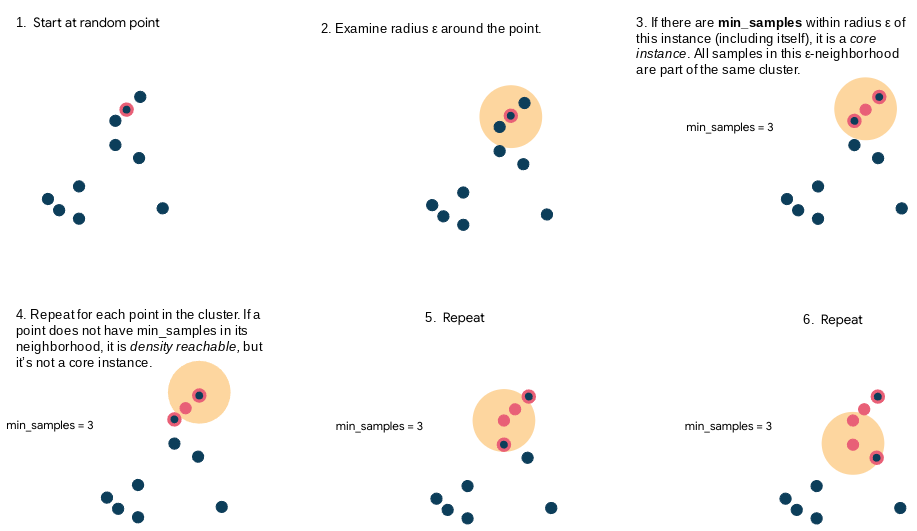
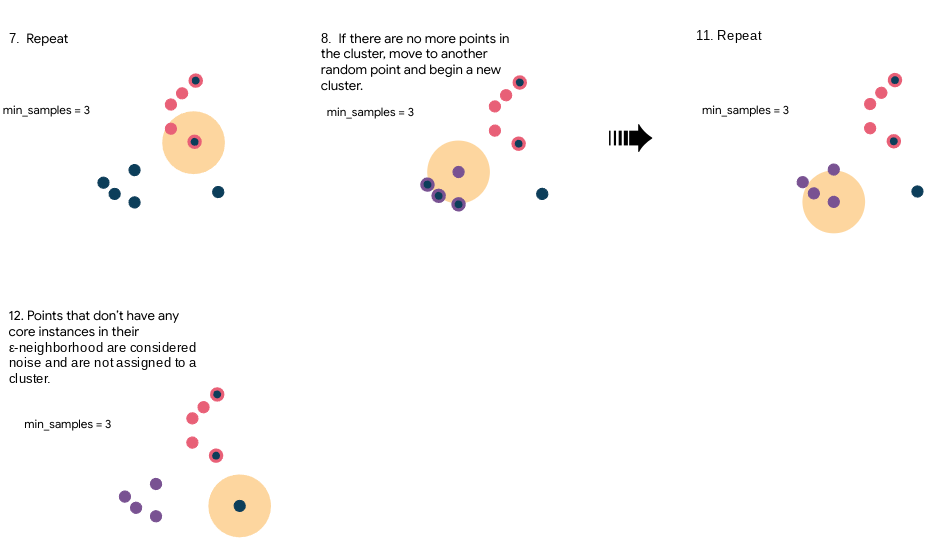

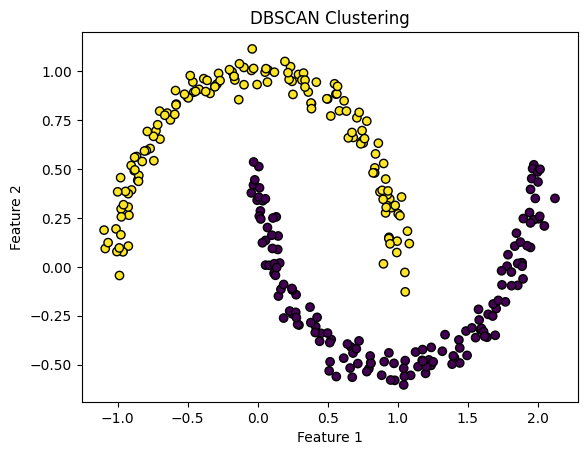

In [ ]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#### OPTICS (Ordering Points To Identify Clustering Structure)

OPTICS is a clustering algorithm related to DBSCAN, designed for identifying spatial clusters in varying densities.

#### Similarities with DBSCAN

1. **Density-Based:** Both OPTICS and DBSCAN are density-based and can identify clusters of arbitrary shapes.
2. **Outlier Detection:** They both can detect and handle outliers effectively.
3. **No Assumption of Cluster Shape:** Neither algorithm assumes spherical clusters, unlike K-Means.

#### Differences from DBSCAN

1. **Parameter Setting:** OPTICS does not require the $ϵ$ parameter (maximum radius of the neighborhood). Instead, it auto-detects this value, which can be beneficial in datasets with varying densities.
2. **Cluster Order:** OPTICS creates an ordered list of points based on the reachability distance, which provides more information about the data structure.
3. **Handling Varying Density:** OPTICS is better suited for datasets with clusters of varying densities, a situation where DBSCAN might struggle.

#### Use Cases

OPTICS is particularly useful in:
- Large datasets with varying densities.
- Cases where defining a global $ϵ$ value (as in DBSCAN) is not practical or leads to suboptimal clustering.
- Spatial data analysis where clusters have different densities.



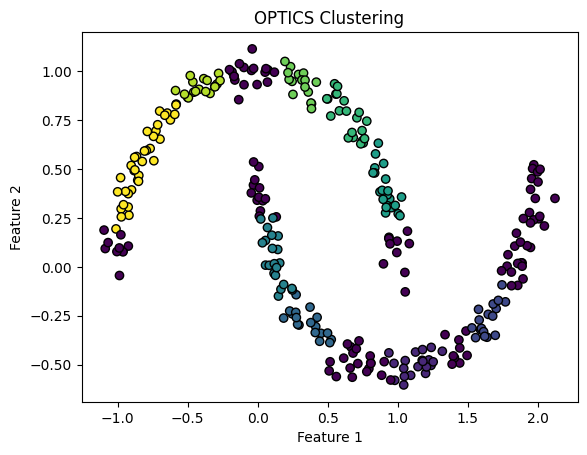

In [ ]:
# Import necessary libraries
from sklearn.cluster import OPTICS
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

# Apply OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
clusters = optics.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('OPTICS Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

| Aspect                       | K-Means                       | K-Medoids                    | Agglomerative                | Divisive                      | DBSCAN                        | OPTICS                        |
|------------------------------|-------------------------------|------------------------------|------------------------------|-------------------------------|-------------------------------|-------------------------------|
| **Clustering Approach**      | Partitioning                  | Partitioning                 | Hierarchical                 | Hierarchical                 | Density-based                 | Density-based                 |
| **Cluster Shape Assumption** | Spherical                     | Arbitrary                    | Arbitrary                    | Arbitrary                    | No spherical assumption       | No spherical assumption       |
| **Handling Varying Density** | Poor                          | Moderate                     | Moderate                     | Moderate                     | Less effective                | More effective                |
| **Parameter Setting**        | Number of clusters (k)        | Number of clusters (k)       | Number of clusters or height | Number of clusters or height | `eps` and `min_samples`       | `min_samples`, `xi`, `min_cluster_size` |
| **Outlier Detection**        | Poor                          | Moderate                     | Moderate                     | Moderate                     | Good                          | Good                          |
| **Cluster Order**            | No specific ordering          | No specific ordering         | Dendrogram based             | Dendrogram based             | No specific ordering          | Ordered list based on reachability |
| **Use Cases**                | Large datasets, well-separated clusters | Large datasets, noise/outliers | Any general dataset          | Any general dataset          | Uniform density datasets      | Large datasets, varying densities |
| **Flexibility**              | Less (fixed k)                | More (actual data points as medoids) | High (various linkage methods) | High (various linkage methods) | Less (fixed `eps`)            | High (variable `eps` for each point) |
| **Global vs Local `eps`**    | Not applicable               | Not applicable               | Not applicable               | Not applicable               | Global `eps` value            | Variable `eps` value for each point |


## Principal Component Analysis (PCA)

## Anomaly Detection